# Importer les bibliothèques nécessaires

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LinearRegression
from scipy.stats import skew, kurtosis, jarque_bera
from sklearn.model_selection import train_test_split
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
plt.style.use('ggplot') # Appliquer le style 'ggplot' à Matplotlib

# PARTIE I : CHARGEMENT ET PREPARATION DES DONNEES

## 1. Chargement et aperçu des donnees

### 1.1. Charger les donnees

In [49]:
df = pd.read_csv("D:/INSSEDS/datasets/delai_livraison.csv")

### 1.2. Visualiser les premieres lignes du DataFrame pour inspection

In [50]:
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


### 1.3. Infos

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [52]:
# Changer le type de la colonne 'Order_ID' en chaîne de caractères
df['Order_ID'] = df['Order_ID'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   object 
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 70.4+ KB


## 2. Traitement des valeurs manquantes

### 2.1. Visualisation des valeurs manquantes

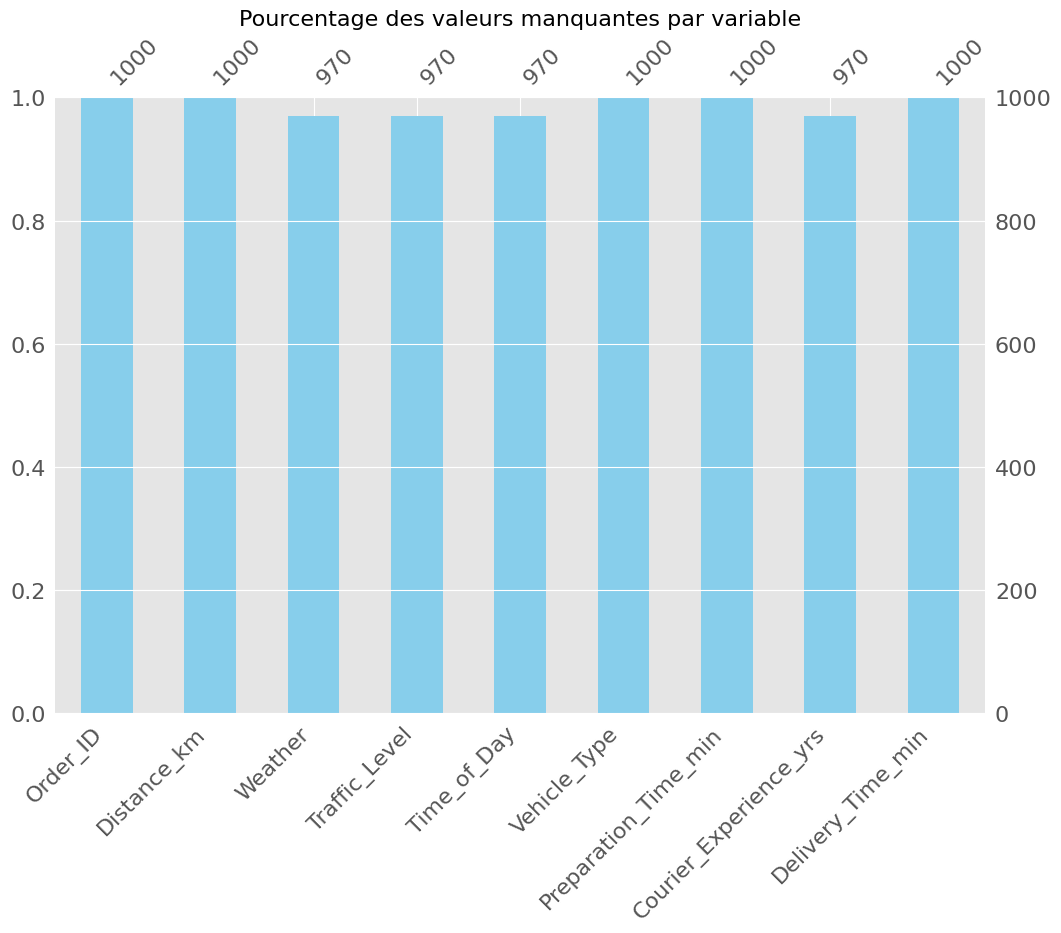

In [53]:
# Visualiser le pourcentage de valeurs manquantes pour chaque colonne
msno.bar(df, color='skyblue', figsize=(12, 8))

# Ajouter un titre
plt.title('Pourcentage des valeurs manquantes par variable', fontsize=16)

# Afficher le graphique
plt.show()

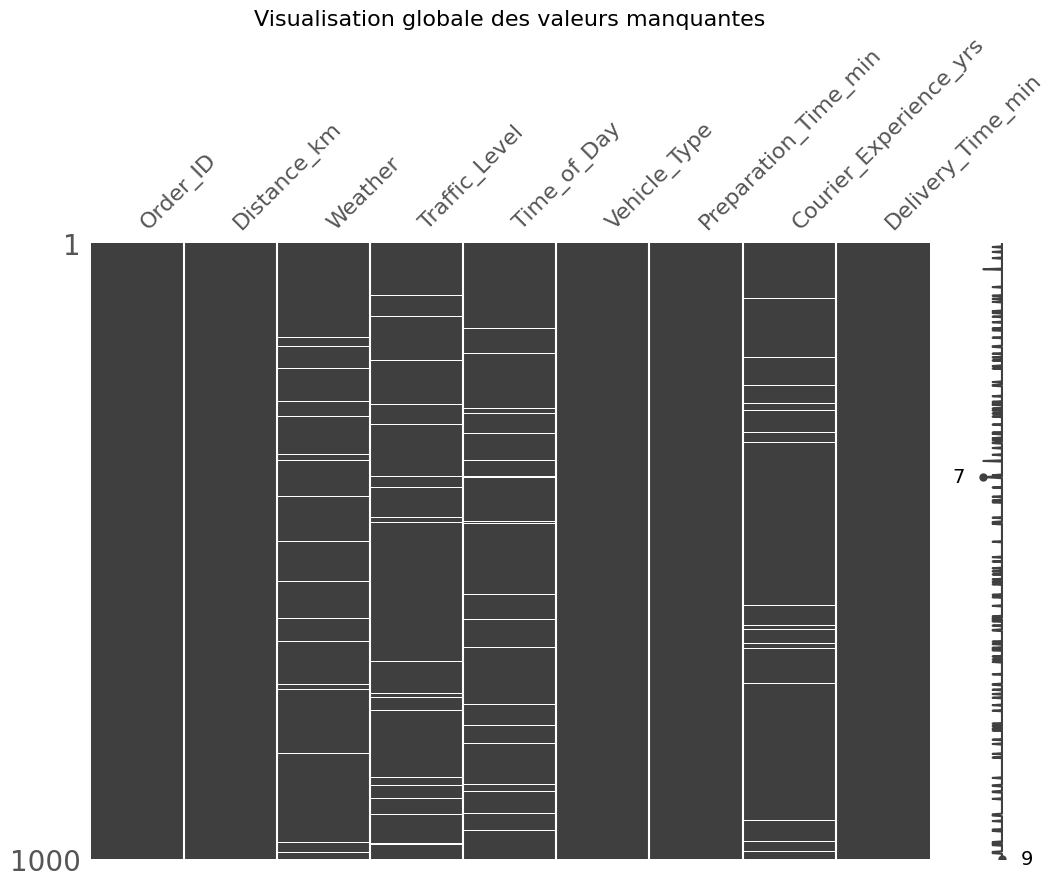

In [54]:
# Visualiser les valeurs manquantes globalement
msno.matrix(df, figsize=(12, 8))

# Ajouter un titre pour la visualisation globale
plt.title('Visualisation globale des valeurs manquantes', fontsize=16)

# Afficher le graphique
plt.show()

### 2.2. Imputation des variables manquantes

In [55]:
# Imputation des colonnes numériques avec la valeur médiane
numeric_columns = ["Courier_Experience_yrs"]
for col in numeric_columns:
    df[col] = df[col].fillna(df[col].median())

# Imputation des colonnes catégoriques avec la valeur modale
categorical_columns = ["Weather", "Traffic_Level", "Time_of_Day"]
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Vérification des valeurs manquantes restantes
df.isnull().sum()

Order_ID                  0
Distance_km               0
Weather                   0
Traffic_Level             0
Time_of_Day               0
Vehicle_Type              0
Preparation_Time_min      0
Courier_Experience_yrs    0
Delivery_Time_min         0
dtype: int64

### 2.3. Visualisation des valeurs manquantes traitées

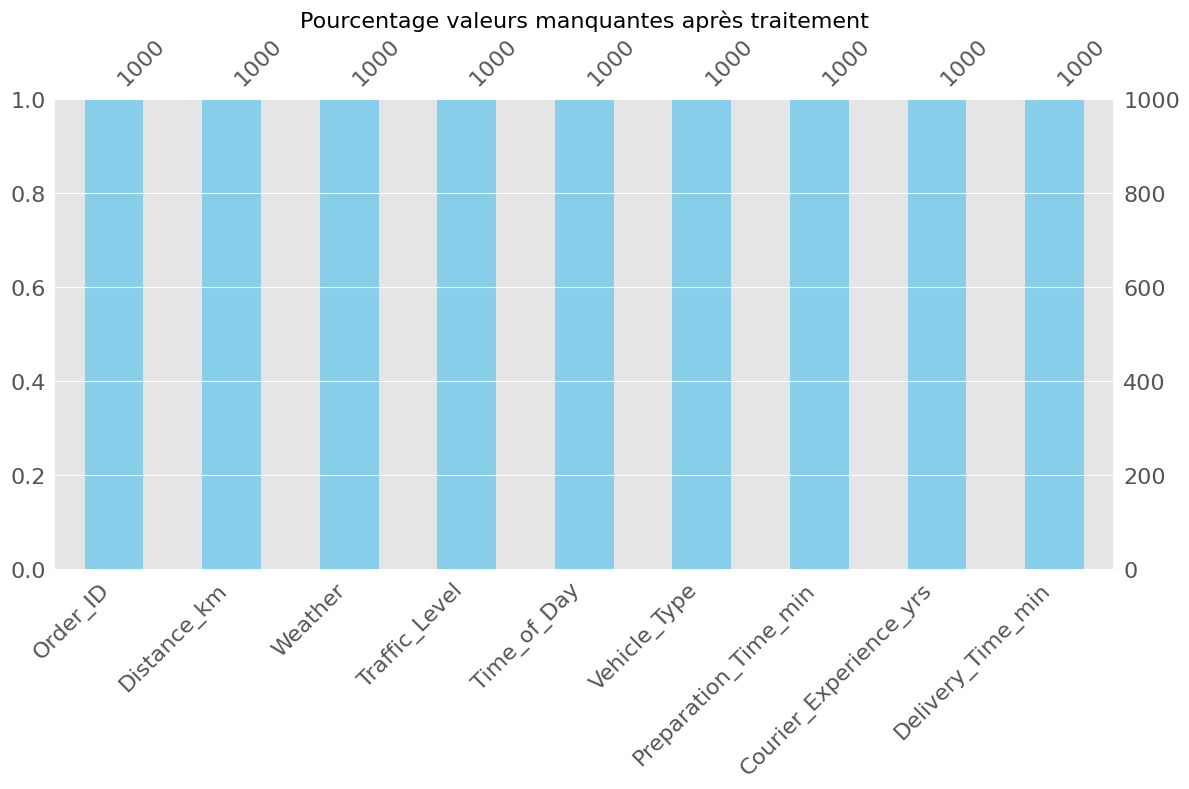

In [56]:
# Visualiser des valeurs manquantes traitées
msno.bar(df, color='skyblue', figsize=(12, 8))

# Ajouter un titre
plt.title('Pourcentage valeurs manquantes après traitement', fontsize=16)

# Afficher le graphique
plt.tight_layout()
plt.show()


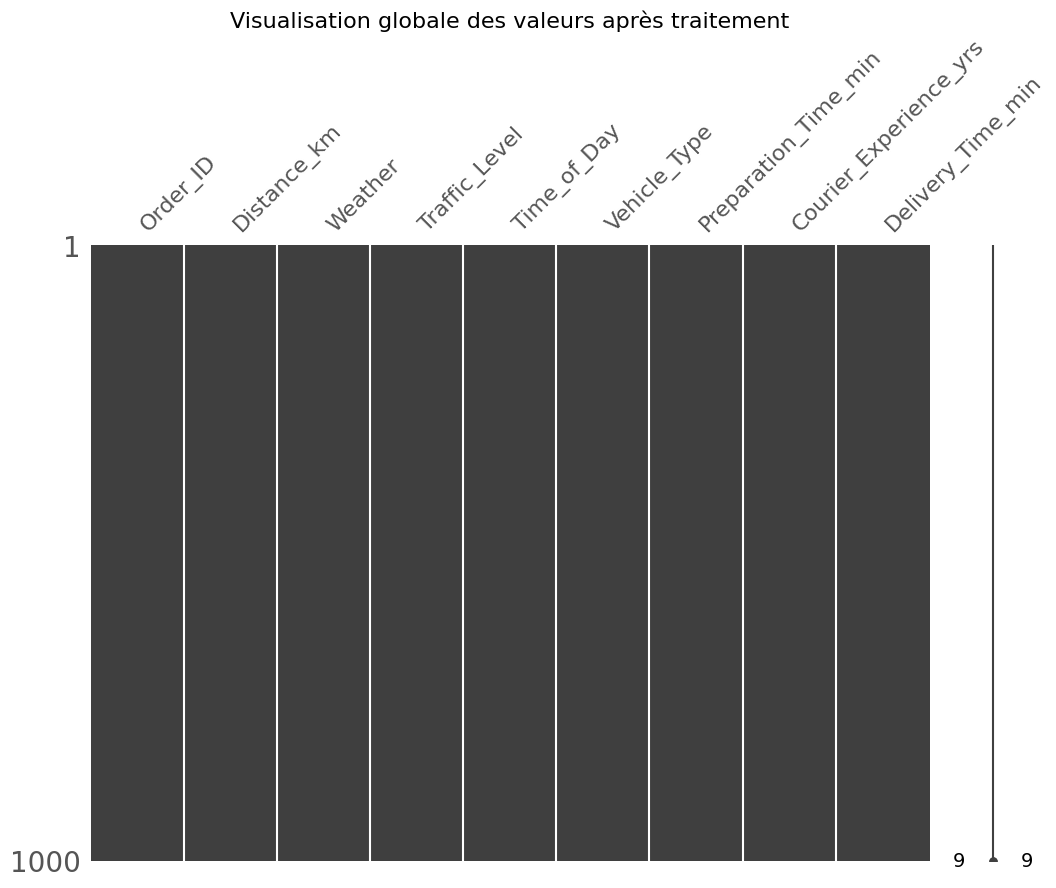

In [57]:
# Visualiser les valeurs manquantes globalement
msno.matrix(df, figsize=(12, 8))

# Ajouter un titre pour la visualisation globale
plt.title('Visualisation globale des valeurs après traitement', fontsize=16)

# Afficher le graphique
plt.show()

## 3. Traitement des valeurs  abberantes et/ ou extremes

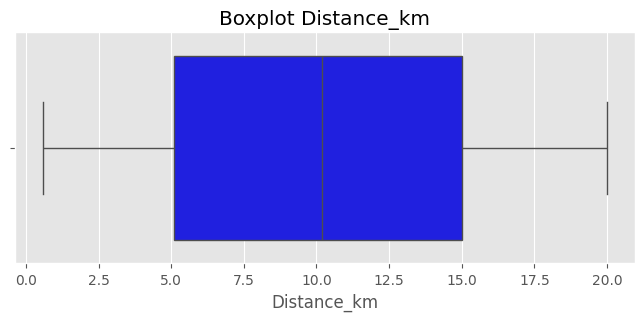

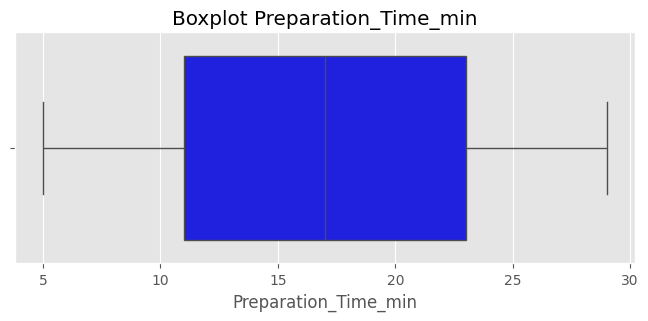

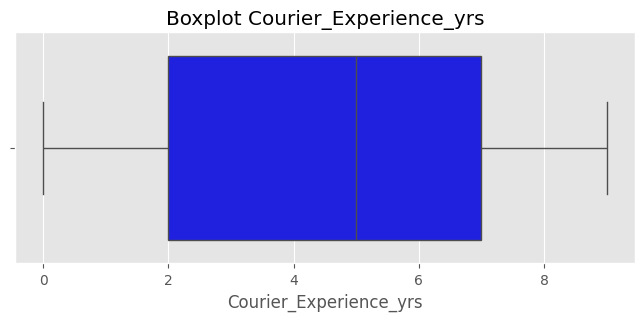

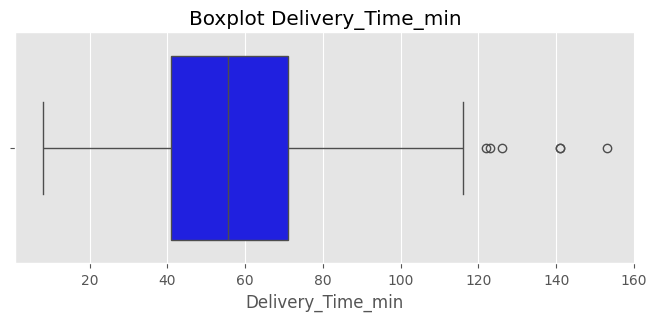

,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,7.93,12,1.0,43
1,16.42,20,2.0,84
2,9.52,28,1.0,59
3,7.44,5,1.0,37
4,19.03,16,5.0,68
...,...,...,...,...
995,8.50,13,3.0,54
996,16.28,8,9.0,71
997,15.62,26,2.0,81
998,14.17,8,0.0,55


In [58]:
# Sélectionner uniquement les colonnes numériques
df_numeric = df.select_dtypes(include=['number'])

# Créer un boxplot pour chaque colonne numérique dans un graphique séparé
for column in df_numeric.columns:
    plt.figure(figsize=(8, 3))
    sns.boxplot(x=df_numeric[column], color='b')
    plt.title(f'Boxplot {column}')
    plt.xlabel(column)
    plt.show()
    
df_numeric


In [59]:
# Calculer les quartiles et l'IQR pour chaque colonne
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

# Définir les bornes de Winsorization
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Appliquer la Winsorization sur chaque colonne numérique
df_winzorized = df_numeric.apply(lambda x: x.clip(lower=lower_bound[x.name], upper=upper_bound[x.name]), axis=0)

# Remplacer les colonnes numériques dans le DataFrame d'origine
df[df_numeric.columns] = df_winzorized
df[df_numeric.columns]

,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,7.93,12,1.0,43
1,16.42,20,2.0,84
2,9.52,28,1.0,59
3,7.44,5,1.0,37
4,19.03,16,5.0,68
...,...,...,...,...
995,8.50,13,3.0,54
996,16.28,8,9.0,71
997,15.62,26,2.0,81
998,14.17,8,0.0,55


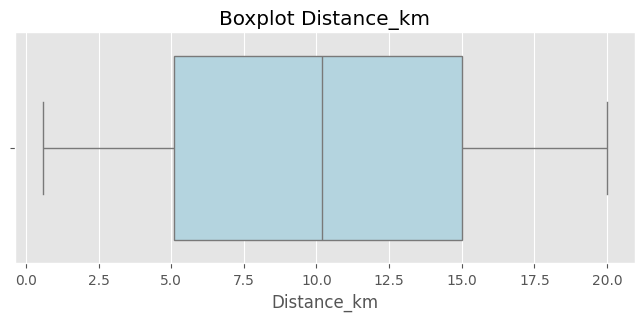

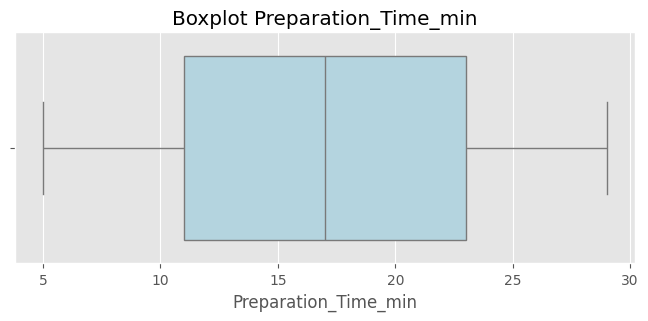

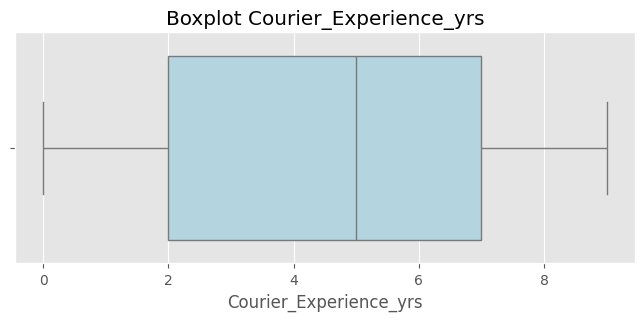

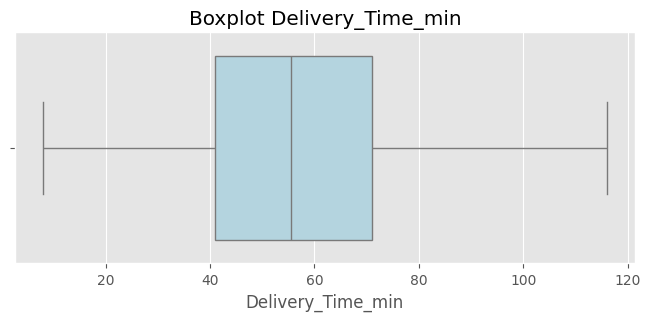

In [60]:
# Sélectionner uniquement les colonnes numériques
df_numeric = df.select_dtypes(include=['number'])

# Créer un boxplot pour chaque colonne numérique dans un graphique séparé
for column in df_numeric.columns:
    plt.figure(figsize=(8, 3))
    sns.boxplot(x=df_numeric[column], color='lightblue')
    plt.title(f'Boxplot {column}')
    plt.xlabel(column)
    plt.show()

# PARTIE II : REG LINEAIRE

## 1. Explorer les relations entre les variables

### 1.1. Calcul et visualisation de la corrélation entre chaque variable et la variable cible

In [61]:
from sklearn.preprocessing import LabelEncoder

# Créer un encodeur pour chaque colonne catégorielle
label_encoders = {}
df_encoded = df.copy()  # Créer une copie de df pour ne pas modifier l'original

for col in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

df_encoded


,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,471,7.93,4,1,0,2,12,1.0,43
1,710,16.42,0,2,1,0,20,2.0,84
2,714,9.52,1,1,3,2,28,1.0,59
3,625,7.44,2,2,0,2,5,1.0,37
4,349,19.03,0,1,2,0,16,5.0,68
...,...,...,...,...,...,...,...,...,...
995,10,8.50,0,0,1,1,13,3.0,54
996,192,16.28,2,1,2,2,8,9.0,71
997,847,15.62,3,0,1,2,26,2.0,81
998,375,14.17,0,1,0,0,8,0.0,55


In [62]:
# Calcul de la corrélation entre toutes les variables et 'Delivery_Time_min'
correlation_matrix = df_encoded.corr()

# Affichage de la corrélation de 'Delivery_Time_min' avec toutes les autres variables
correlation_with_delivery_time = correlation_matrix['Delivery_Time_min']
print(correlation_with_delivery_time)


Order_ID                 -0.042170
Distance_km               0.787378
Weather                   0.136298
Traffic_Level            -0.105355
Time_of_Day              -0.001271
Vehicle_Type             -0.008590
Preparation_Time_min      0.307900
Courier_Experience_yrs   -0.088108
Delivery_Time_min         1.000000
Name: Delivery_Time_min, dtype: float64


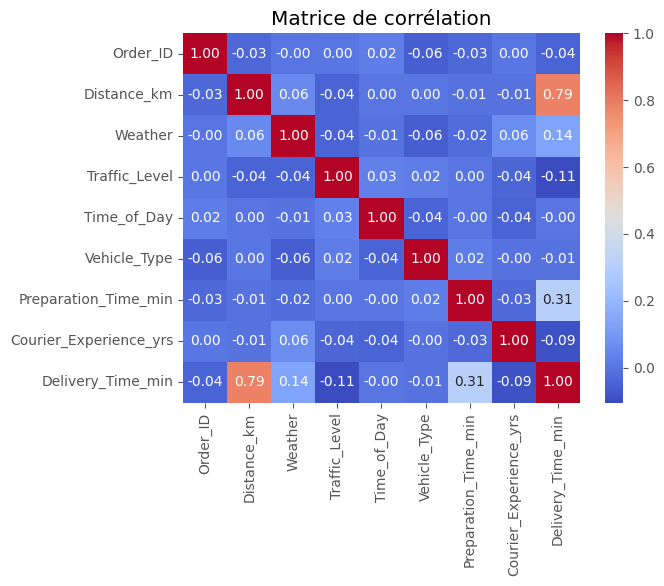

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap de la matrice de corrélation
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Matrice de corrélation")
plt.show()


In [64]:
# Sélectionner les colonnes numériques
X_numeric = df.select_dtypes(include=['number'])
# Définir y comme étant la colonne cible
y = df['Delivery_Time_min']
# Inclure la cible dans le DataFrame utilisé pour la corrélation
X_numeric_with_target = X_numeric.copy()
X_numeric_with_target['Delivery_Time_min'] = y

In [65]:
# Calcul de la matrice de corrélation
correlation_matrix = X_numeric.corr()
correlation_matrix

,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
Distance_km,1.000000,-0.009037,-0.007534,0.787378
Preparation_Time_min,-0.009037,1.000000,-0.030842,0.307900
Courier_Experience_yrs,-0.007534,-0.030842,1.000000,-0.088108
Delivery_Time_min,0.787378,0.307900,-0.088108,1.000000


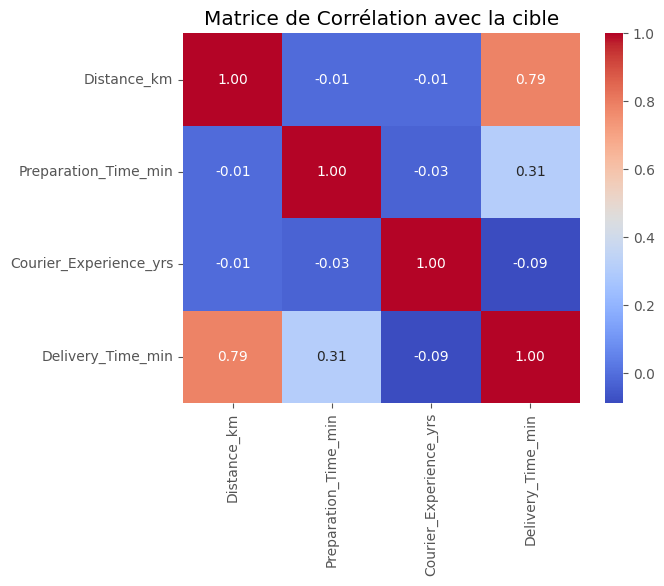

In [66]:
# Afficher la matrice de corrélation
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de Corrélation avec la cible')
plt.show()

### 1.2. Sélectionner les variables les plus explicatives

In [67]:
correlations = X_numeric.corrwith(y)
correlations

Distance_km               0.787378
Preparation_Time_min      0.307900
Courier_Experience_yrs   -0.088108
Delivery_Time_min         1.000000
dtype: float64

In [68]:
# Sélectionner les variables avec une corrélation absolue supérieure à un seuil
threshold_corr = 0.3  # Retenons cette valeur comme seuil de corrélation
selected_variables = correlations[correlations.abs() > threshold_corr].index.tolist()

# Exclure la variable cible 'Delivery_Time_min' de 'correlations'
selected_variables = [var for var in selected_variables if var != 'Delivery_Time_min']

print("Variables sélectionnées sans la cible :", selected_variables)

Variables sélectionnées sans la cible : ['Distance_km', 'Preparation_Time_min']


## 2. Construction du modèle de régression linéaire

### 2.1. Partitionnement des données en ensemble d'entraînement et de test

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Sélection des variables et préparation des données
X_selected = X_numeric[selected_variables]  # Variables sélectionnées
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### 2.2. Le modèle de régression linéaire

In [70]:
# Créer et entraîner le modèle de régression linéaire
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

In [71]:
# Faire des prédictions sur l'ensemble de test
y_pred = linear_model.predict(X_test_scaled)

### 2.3 Calculer les métriques de performance

In [72]:
# Afficher les coefficients du modèle
print("\nCoefficients du modèle de régression linéaire :")
coefficients = pd.DataFrame(linear_model.coef_, index=X_selected.columns, columns=["Coefficient"])
coefficients


Coefficients du modèle de régression linéaire :


,Coefficient
Distance_km,17.209173
Preparation_Time_min,7.001535


In [73]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Faire des prédictions sur l'ensemble d'entraînement
y_train_pred = linear_model.predict(X_train_scaled)

# Calcul des métriques pour l'ensemble d'entraînement
r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)

# Calcul des métriques pour l'ensemble de test
r2_test = r2_score(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)

# Construction du tableau de résultats
df_metrics = pd.DataFrame({
    'Métrique': ['R²', 'MSE', 'RMSE'],
    'Train': [r2_train, mse_train, rmse_train],
    'Test': [r2_test, mse_test, rmse_test]
})

# Afficher le tableau des métriques
print(df_metrics)


  Métrique       Train        Test
0       R²    0.715340    0.734336
1      MSE  135.760156  118.064637
2     RMSE   11.651616   10.865755


In [74]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats

# Entraîner le modèle
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Faire des prédictions
y_train_pred = linear_model.predict(X_train_scaled)
y_test_pred = linear_model.predict(X_test_scaled)

# Calcul des résidus
residuals = y_train - y_train_pred

# Nombre d'observations et de caractéristiques
n = X_train_scaled.shape[0]  # Nombre d'observations
p = X_train_scaled.shape[1]  # Nombre de paramètres (caractéristiques)

# Calcul de la variance des erreurs
error_variance = np.var(residuals)

# Calcul des MSE
mse = mean_squared_error(y_train, y_train_pred)

# AIC et BIC
aic = n * np.log(mse) + 2 * (p + 1)  # +1 pour l'intercept
bic = n * np.log(mse) + np.log(n) * (p + 1)

# F-statistic (calcul basé sur la variance expliquée et résiduelle)
ss_total = np.sum((y_train - np.mean(y_train))**2)
ss_residual = np.sum(residuals**2)
f_statistic = (ss_total - ss_residual) / (p) / (ss_residual / (n - p - 1))

# Probabilité associée à la statistique F
prob_f_statistic = 1 - stats.f.cdf(f_statistic, p, n - p - 1)

# Log-Likelihood (approximé)
log_likelihood = -0.5 * n * np.log(2 * np.pi * error_variance) - 0.5 * np.sum((residuals**2) / error_variance)

# Degrés de liberté
df_residuals = n - p - 1  # Degrés de liberté des résidus
df_model = p  # Degrés de liberté du modèle

# Affichage des résultats
print(f"F-statistic: {f_statistic}")
print(f"Prob (F-statistic): {prob_f_statistic}")
print(f"Log-Likelihood: {log_likelihood}")
print(f"AIC: {aic}")
print(f"BIC: {bic}")
print(f"n: {n}")
print(f"Df Residuals: {df_residuals}")
print(f"Df_model: {df_model}")


# Création du DataFrame des résultats
results_df = pd.DataFrame({
    'Métrique': ['F-statistic', 'Prob (F-statistic)', 'Log-Likelihood', 'AIC', 'BIC', 'n', 'Df Residuals', 'Df Model'],
    'Valeur': [f_statistic, prob_f_statistic, log_likelihood, aic, bic, n, df_residuals, df_model]
})

# Afficher les résultats sous forme de tableau
results_df


F-statistic: 1001.4158440710885
Prob (F-statistic): 1.1102230246251565e-16
Log-Likelihood: -3099.5067352906926
AIC: 3934.711817453908
BIC: 3948.765652636912
n: 800
Df Residuals: 797
Df_model: 2


,Métrique,Valeur
0,F-statistic,1.001416e+03
1,Prob (F-statistic),1.110223e-16
2,Log-Likelihood,-3.099507e+03
3,AIC,3.934712e+03
4,BIC,3.948766e+03
5,n,8.000000e+02
6,Df Residuals,7.970000e+02
7,Df Model,2.000000e+00


In [75]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy import stats
from statsmodels.stats.stattools import durbin_watson

# Entraînement du modèle
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Faire des prédictions
y_train_pred = linear_model.predict(X_train_scaled)
y_test_pred = linear_model.predict(X_test_scaled)

# Calcul des résidus
residuals = y_train - y_train_pred

# Durbin-Watson : teste l'autocorrélation des résidus
dw_statistic = durbin_watson(residuals)

# Jarque-Bera : teste la normalité des résidus
jb_statistic, jb_p_value = stats.jarque_bera(residuals)

# Skewness : mesure de l'asymétrie des résidus
skewness = stats.skew(residuals)

# Kurtosis : mesure de l'aplatissement des résidus
kurtosis = stats.kurtosis(residuals)

# Condition Number : mesure de la colinéarité dans les variables indépendantes
X_with_const = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]  # Ajouter une constante pour l'intercept
condition_number = np.linalg.cond(X_with_const)

# Créer un DataFrame avec les résultats
results_df = pd.DataFrame({
    'Métrique': ['Durbin-Watson', 'Jarque-Bera Statistic', 'Jarque-Bera p-value', 'Skewness', 'Kurtosis', 'Condition Number'],
    'Valeur': [dw_statistic, jb_statistic, jb_p_value, skewness, kurtosis, condition_number]
})

# Affichage du tableau des résultats
results_df


,Métrique,Valeur
0,Durbin-Watson,2.007057
1,Jarque-Bera Statistic,2140.803291
2,Jarque-Bera p-value,0.000000
3,Skewness,1.864054
4,Kurtosis,7.094033
5,Condition Number,1.016810


In [76]:
# Créer un DataFrame avec les valeurs réelles et prédites
comparison_df = pd.DataFrame({
    'Réel': y_test,
    'Prédiction': y_pred
})

# Afficher le DataFrame
print(comparison_df)

     Réel  Prédiction
521    32   41.436166
737    68   65.678281
740    39   35.708194
660    44   43.266346
411    85   84.731093
..    ...         ...
408    78   79.257667
332    28   28.971670
208    60   56.445634
613    45   44.975235
78     48   42.687966

[200 rows x 2 columns]


##Prédiction 

In [77]:
import pandas as pd
import numpy as np

# Supposons que les noms de colonnes pour les caractéristiques sont 'distance' et 'preparation_time'
col_names = ['Distance_km', 'Preparation_Time_min']

# Nouvelle donnée : distance de 10 km et temps de préparation de 15 minutes
nouvelle_donnee = np.array([[10, 15]])

# Créer un DataFrame pour les nouvelles données avec les mêmes colonnes que celles utilisées pour entraîner le modèle
nouvelle_donnee_df = pd.DataFrame(nouvelle_donnee, columns=col_names)

# Mettre à l'échelle les nouvelles données en utilisant le scaler que vous avez utilisé pour entraîner le modèle
nouvelle_donnee_scaled = scaler.transform(nouvelle_donnee_df)

# Faire la prédiction avec le modèle linéaire
prediction = linear_model.predict(nouvelle_donnee_scaled)

# Afficher la prédiction
print("Temps de livraison prédit:", prediction)


Temps de livraison prédit: [54.6014983]


## 3. Vérification des hypothèses du modèles

### Dispersion entre les valeurs réelles et les prédictions

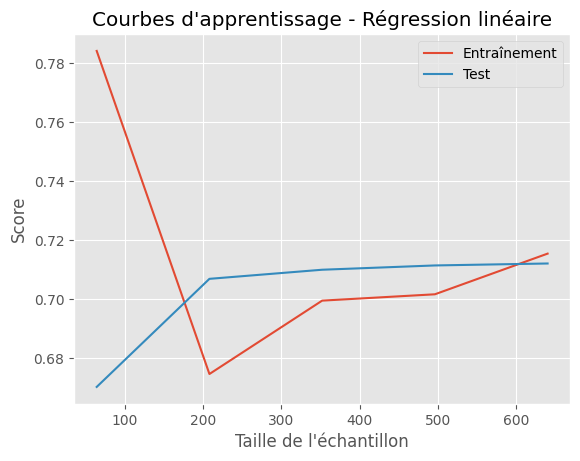

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Créer et entraîner le modèle de régression linéaire
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Calcul des courbes d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(linear_model, X_train_scaled, y_train, cv=5)

# Calcul de la moyenne et de l'écart type des scores de test et d'entraînement
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

# Visualisation des courbes d'apprentissage
plt.plot(train_sizes, train_mean, label="Entraînement")
plt.plot(train_sizes, test_mean, label="Test")
plt.xlabel("Taille de l'échantillon")
plt.ylabel("Score")
plt.title("Courbes d'apprentissage - Régression linéaire")
plt.legend()
plt.show()


### 3.1. Linéarité

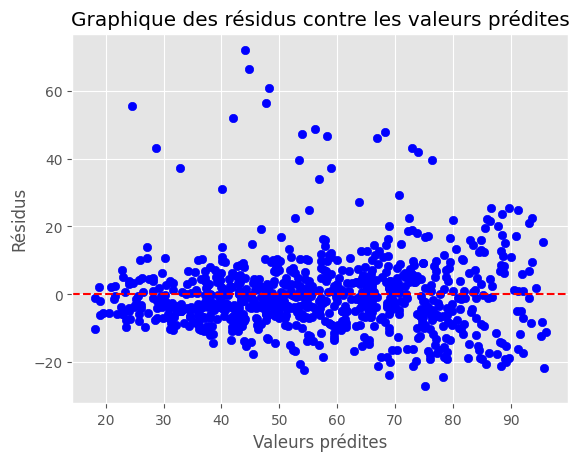

In [79]:
# Tracez les résidus contre les valeurs prédites pour vérifier la linéarité.
y_pred = linear_model.predict(X_train_scaled)
# Calcul des résidus
residuals = y_train - y_pred

plt.scatter(y_pred, residuals, color='blue')  # Spécification de la couleur du nuage points
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valeurs prédites')
plt.ylabel('Résidus')
plt.title('Graphique des résidus contre les valeurs prédites')
plt.show()

### 3.2 Vérification de l'autocorrélation : indépendance des erreurs (Durbin-Watson)

In [80]:
from statsmodels.stats.stattools import durbin_watson

# Calcul de la statistique de Durbin-Watson sur les résidus
dw_stat = durbin_watson(residuals)

print(f"Statistique de Durbin-Watson : {dw_stat}")


Statistique de Durbin-Watson : 2.007056711400151


**Conclusion :**
Le modèle satisfait le critère d'absence d'autocorrélation (la statistique ≈ 2), ce qui renforce la fiabilité des estimations des coefficients. Vous pouvez donc interpréter les résultats avec confiance.

### 3.3. Vérification de la normalité : normalité des erreurs

In [81]:
# Test de Shapiro-Wilk
shapiro_test = stats.shapiro(residuals)

# Test d'Anderson-Darling
anderson_test = stats.anderson(residuals, dist='norm')

# Test de Kolmogorov-Smirnov
ks_test = stats.kstest(residuals, 'norm')

# Mettre les résultats dans un dataframe
data_normality = pd.DataFrame({
    'Test de normalité': ['Shapiro-Wilk', 'Anderson-Darling', 'Kolmogorov-Smirnov'],
    'Statistique': [shapiro_test.statistic, anderson_test.statistic, ks_test.statistic],
    'p-value': [shapiro_test.pvalue, 'N/A', ks_test.pvalue]
})

# Afficher le tableau
print(data_normality)

    Test de normalité  Statistique p-value
0        Shapiro-Wilk     0.870834     0.0
1    Anderson-Darling    18.441938     N/A
2  Kolmogorov-Smirnov     0.446443     0.0


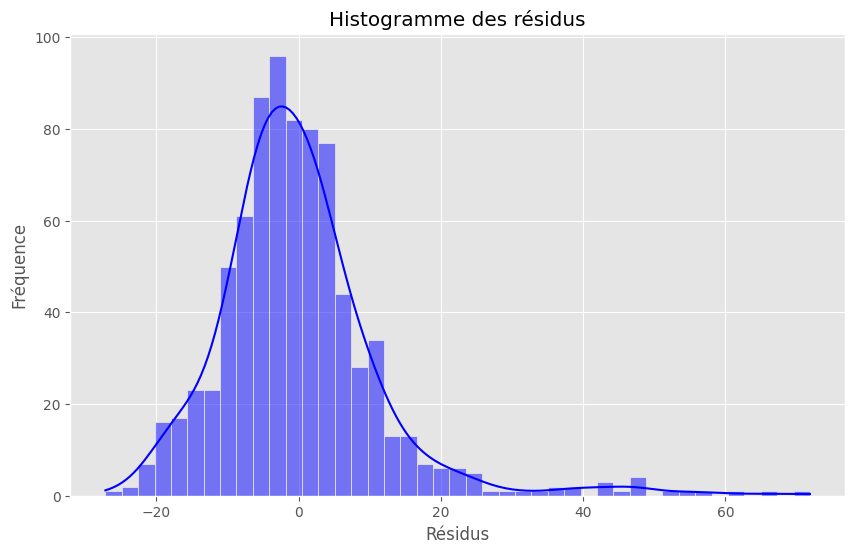

In [82]:
# Histogramme des résidus
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color="blue")
plt.title('Histogramme des résidus')
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.show()


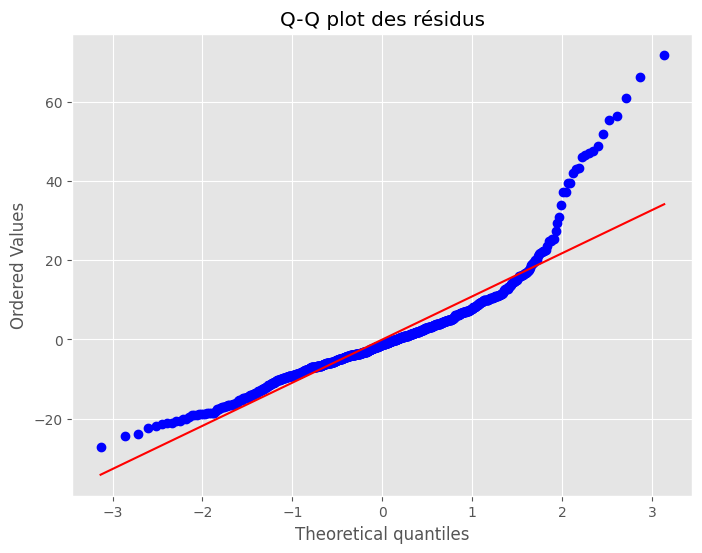

In [83]:
# Q-Q plot pour tester la normalité des résidus
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q plot des résidus')
plt.show()

### Moyenne des termes d'erreur

In [84]:
residuals.mean()

7.105427357601002e-16

**Conclusion :**
Une moyenne des résidus proche de zéro est généralement un bon signe que le modèle n'est pas biaisé. Dans votre Bien que la moyenne des résidus soit légèrement négative, elle n'est pas suffisamment importante pour suggérer un problème majeur de biais dans le modèle.

### Multicolinéarité (Variance Inflation Factor - VIF)

In [85]:
# Calcul du VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(X_numeric.values, i) for i in range(X_numeric.shape[1])]
# Afficher les résultats
print(vif_data)

                 Variable        VIF
0             Distance_km  13.446636
1    Preparation_Time_min   7.444736
2  Courier_Experience_yrs   2.759401
3       Delivery_Time_min  25.740751


### Validation croisée

In [86]:
from sklearn.model_selection import cross_val_score

# Effectuer la validation croisée (par exemple, 5 folds)
cv_scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=5, scoring='r2')

# Afficher les scores R² pour chaque fold
print(f"Scores R² pour chaque fold : {cv_scores}")

# Calculer et afficher la moyenne des scores R²
mean_r2 = np.mean(cv_scores)
print(f"Score R² moyen sur les 5 folds : {mean_r2:.4f}")

Scores R² pour chaque fold : [0.74314059 0.63332572 0.73011083 0.70226273 0.75192538]
Score R² moyen sur les 5 folds : 0.7122


# PARTIE III : ANOVA

## 1. Graphe des délais de livraison selon la météo

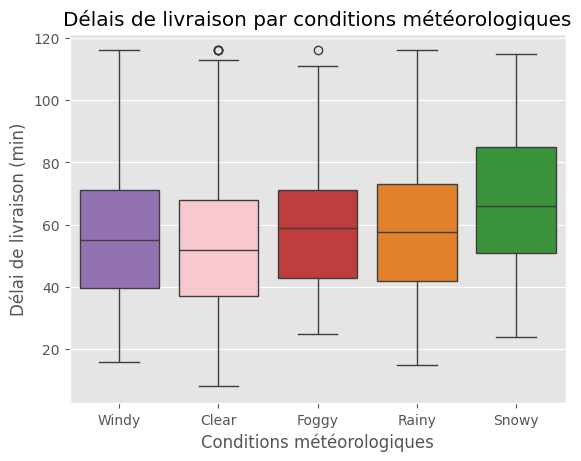

In [87]:
# Palette personnalisée pour le boxplot
palette = {
    'Sunny': '#1f77b4',   # Bleu
    'Rainy': '#ff7f0e',  # Orange
    'Snowy': '#2ca02c',   # Vert
    'Foggy': '#d62728',   # Rouge
    'Windy': '#9467bd',    # Violet
    'Clear':  'pink'    # Rose
}

sns.boxplot(x='Weather', y='Delivery_Time_min', hue='Weather', data=df, palette=palette, dodge=False)
plt.title('Délais de livraison par conditions météorologiques')
plt.xlabel('Conditions météorologiques')
plt.ylabel('Délai de livraison (min)')
plt.show()


In [88]:
Q1 = df['Delivery_Time_min'].quantile(0.25)
Q3 = df['Delivery_Time_min'].quantile(0.75)
IQR = Q3 - Q1
df_filtered = df[(df['Delivery_Time_min'] >= (Q1 - 1.5 * IQR)) & (df['Delivery_Time_min'] <= (Q3 + 1.5 * IQR))]


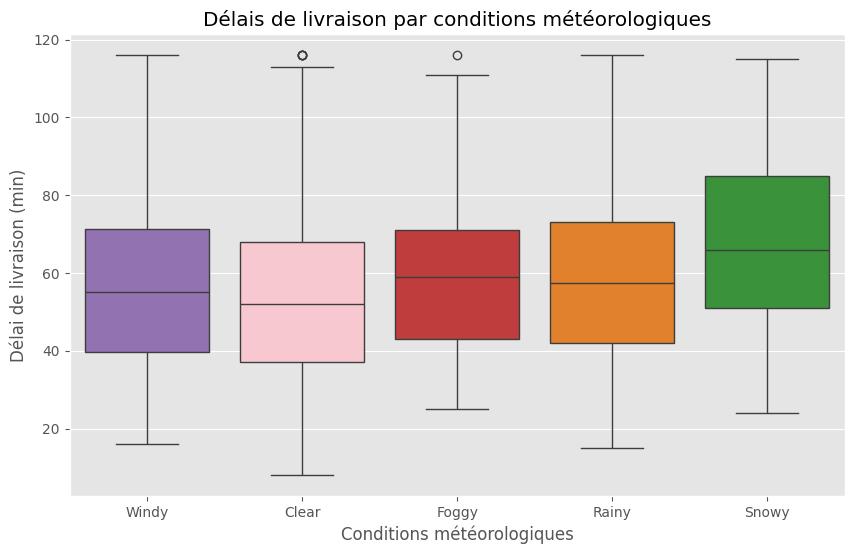

In [89]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Weather', y='Delivery_Time_min', hue='Weather', data=df_filtered, palette=palette, dodge=False)
plt.title('Délais de livraison par conditions météorologiques')
plt.xlabel('Conditions météorologiques')
plt.ylabel('Délai de livraison (min)')
plt.show()

## 2. Vérification des hypothèses

### 2.1. Normalité des résidus

In [90]:
weather_groups = [group['Delivery_Time_min'].values for name, group in df.groupby('Weather')]
stat, p_normal = stats.shapiro(df['Delivery_Time_min'])
print(f"Test de normalité (Shapiro-Wilk) : Stat={stat:.4f}, p-value={p_normal:.4f}")

Test de normalité (Shapiro-Wilk) : Stat=0.9847, p-value=0.0000


1. **Statistique** : 0.9847

2. **p-valeur** : 0.0000 (inférieure à 0.05)


   **Conclusion** :
La p-valeur indique que la distribution des résidus ne suit pas une loi normale.

   Cela viole l'une des hypothèses de base de l'ANOVA (normalité des résidus).

### 2.2. Homogénéité des variances

In [91]:
stat, p_var = stats.levene(*weather_groups)
print(f"Test d'homogénéité des variances (Levene) : Stat={stat:.4f}, p-value={p_var:.4f}")

Test d'homogénéité des variances (Levene) : Stat=0.4392, p-value=0.7803


1. **Statistique** : 0.4392

2. **p-valeur** : 0.7803 (supérieure à 0.05)

   **Conclusion** :
La p-valeur indique que les variances des délais de livraison entre les groupes de conditions météorologiques sont homogènes. 
   L'hypothèse d'homogénéité des variances (homoscédasticité) est satisfaite.

## 3. Modèle ANOVA

In [92]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ajuster le modèle avec OLS
model = ols('Delivery_Time_min ~ C(Weather)', data=df).fit()

# Calculer la table ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

print("\nTable ANOVA :")
print(anova_table)

# Interprétation
if anova_table['PR(>F)'].iloc[0] < 0.05:
    print("\nConclusion : Les délais de livraison diffèrent significativement entre les conditions météorologiques.")
else:
    print("\nConclusion : Aucune différence significative dans les délais de livraison entre les conditions météorologiques.")



Table ANOVA :
                   sum_sq     df          F        PR(>F)
C(Weather)   20006.909747    4.0  11.040332  9.171176e-09
Residual    450776.206253  995.0        NaN           NaN

Conclusion : Les délais de livraison diffèrent significativement entre les conditions météorologiques.


**p-valeur de 9.171176e-09** : Cette valeur est très faible, ce qui suggère une différence significative entre les groupes de conditions météorologiques.
Cependant, la violation de l'hypothèse de normalité peut rendre les résultats de l'ANOVA moins fiables.

In [93]:
from scipy.stats import kruskal

# Test de Kruskal-Wallis
stat, p_value = kruskal(*[df['Delivery_Time_min'][df['Weather'] == condition] for condition in df['Weather'].unique()])

print(f"Statistique de Kruskal-Wallis: {stat:.4f}, p-valeur: {p_value:.4f}")

# Conclusion basée sur la p-valeur
if p_value < 0.05:
    print("Les délais de livraison diffèrent significativement entre les conditions météorologiques (test de Kruskal-Wallis).")
else:
    print("Aucune différence significative dans les délais de livraison entre les conditions météorologiques (test de Kruskal-Wallis).")


Statistique de Kruskal-Wallis: 37.0479, p-valeur: 0.0000
Les délais de livraison diffèrent significativement entre les conditions météorologiques (test de Kruskal-Wallis).


1. **Statistique** :  37.0479

2. **p-valeur** : 0.0000 (inférieure à 0.05)

   **Conclusion** :
La p-valeur très faible indique que les délais de livraison ne sont pas distribués de manière identique entre les groupes de conditions météorologiques. 

   Cela valide l'hypothèse selon laquelle la météo influence les délais de livraison.